In [179]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os
import seaborn as sns
from numpy.linalg import norm
from numpy.linalg import inv
import pandas as pd

# 1(a)

In [180]:
# square dimension
m=10

# generate mxm symmetric matrix
A = np.random.randn(m,m)
A = (A+A.T)/2

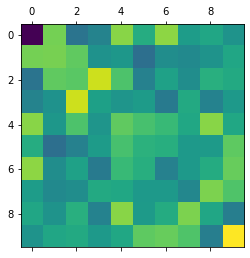

In [181]:
# visualize the symmetric matrix
plt.matshow(A)

In [182]:
# check the determinant
np.linalg.det(A)

-555.4311690335859

In [183]:
# calculate eigenvalues and eigenvectors
w_true,v_true = np.linalg.eig(A)

# 1(b)

In [184]:
def power_iteration(A, iterations):
    
    '''Finds the largest eigenvalue of matrix A.'''
    
    w_true,v_true = np.linalg.eig(A)
    w0_true = w_true[np.argmax(np.abs(w_true))]
    
    # set up plot
    plt.figure(figsize=[10,6])
    
    # first guess at eigenvector
    b = np.random.randn(A.shape[1])
    b = b / norm(b)
    
    # power iterate
    for i in np.arange(0,iterations,1):
        b = A@b / np.linalg.norm(A@b)
        
        # use rayleigh quotient to compute eigenvalue
        w = b.T.conjugate()@A@b/(b.T.conjugate()@b)
        
        #plot eigenvalue approaching true eigenvalue
        plt.scatter(i,np.abs(w0_true-w), c='C0', alpha=.3)
        if i == iterations-1:
            plt.scatter(i,np.abs(w0_true-w), c='C0')
            
    plt.title('Power Iteration - Largest Eigenvalue Error')
    plt.yscale('log');
    plt.ylabel('Absolute Error \n (Log Scale)'); plt.xlabel('Iterations');
    
    return w,b

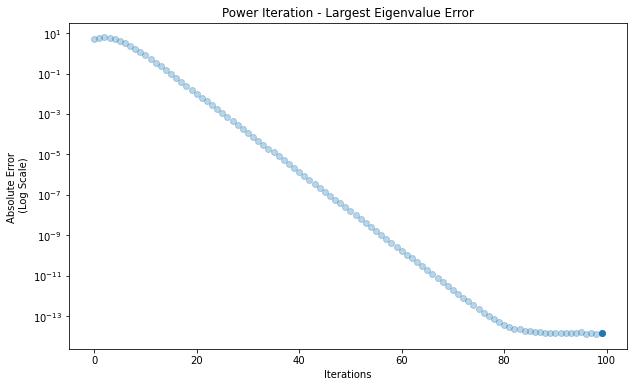

In [185]:
w,b = power_iteration(A, iterations=100)

Error in the iteration method drops exponentially as seen in the Log-Linear plot above, until settling around $ 10^{-14} $. Likely no longer dropping due to roundoff at floating point precision.

# 1(c)

In [186]:
def rayleigh_quotient_iteration(A, iterations=10):
    
    '''Finds the eigenvalues of matrix A.'''
    
    w_true,v_true = np.linalg.eig(A)
    w0_true = w_true[np.argmax(np.abs(w_true))]
    
    # first guess at eigenvector
    b = np.random.rand(A.shape[0])
    b = b / norm(b)

    q,r = np.linalg.qr(A)
    
    # first guess at eigenvalue
    w = b.T.conjugate()@A@b/(b.T.conjugate()@b)

    # Rayleigh Quotient iteration
    for i in np.arange(0,iterations,1):

        b = inv((A - w*np.identity(A.shape[0])))@b / norm(inv((A - w*np.identity(A.shape[0])))@b)
        w = b.T.conjugate()@A@b/(b.T.conjugate()@b)

    return w,b

In [187]:
w,b = rayleigh_quotient_iteration(A)

In [188]:
w0_true = w_true[min(range(len(w_true)), key=lambda j: abs(w_true[j]-w))]

In [189]:
w

0.7141321774127465

In [190]:
w0_true

0.714132177412747

Simply guessing at the eigenvectors and performing Rayleigh Quotient Iteration converges cubically to a single eigenvalue and vector. This does not give all 10 eigenvalues, and randomly guessing until all 10 are found would be inefficient.

I will have to improve the inital guesses to improve the convergance.

In [191]:
def rayleigh_quotient_iteration(A, iterations=10):
    
    '''Finds the eigenvalues of matrix A.'''
    
    w_true,v_true = np.linalg.eig(A)
    w0_true = w_true[np.argmax(np.abs(w_true))]
    
    w_found = []
    
    # first guess at eigenvector
    b = np.random.rand(A.shape[0])
    b = b / norm(b)

    q,r = np.linalg.qr(A)
    
    # first guess at eigenvalue
    w = b.T.conjugate()@A@b/(b.T.conjugate()@b)

    # Rayleigh Quotient iteration
    for i in np.arange(0,iterations,1):

        b = inv((A - w*np.identity(A.shape[0])))@b / norm(inv((A - w*np.identity(A.shape[0])))@b)
        w = b.T.conjugate()@A@b/(b.T.conjugate()@b)

        w0_true = w_true[min(range(len(w_true)), key=lambda j: abs(w_true[j]-w))]

        if np.abs(w0_true-w) < 1e-13:
            if np.isclose(w_found, w).any():
                break
            else:
                print(len(w_found))
                w_found.append(w)
            break
    
    return w_found,b

In [192]:
w,b = rayleigh_quotient_iteration(A)
w

0


[0.7141321774127465]

In [193]:
w_true

array([-4.66772918,  3.73316879, -2.70027444, -2.4638162 ,  2.86126323,
       -1.29182478, -0.6195318 ,  2.03435912,  0.71413218,  1.44012273])

# 1(d)

# 2(a)

In [194]:
# Iterate through the cropped images folder finding all files
filelist=[]
for root, dirs, files in os.walk('C:\\Users\\Kelton\\UW\\AMATH584\\Homework\\hw2\\yalefaces_cropped'):
    for file in files:
        #append the file name to the list
        filelist.append(os.path.join(root,file))
        
print('number of images:',len(filelist))

number of images: 272


In [195]:
# Build a list of images from the files
images=[]
for imgfile in filelist:
    images.append(plt.imread(imgfile))

In [196]:
# create a list of all array data from the images
A = []
for image in images:
    A.append(np.reshape(image,(-1,1)))

# create array from data
A = np.array(A).squeeze()
# check the shape of the array, each image is a column
print('A Shape:',A.transpose().shape)
A = A.transpose()

A Shape: (32256, 272)


Create a square correlation matrix:

In [197]:
Acorr = pd.DataFrame(A).corr()

In [198]:
Acorr.shape

(272, 272)

Define power iteration:

In [199]:
def power_iteration_clean(A, iterations):
    
    '''Finds the largest eigenvalue of matrix A.'''
    
    w_true,v_true = np.linalg.eig(A)
    w0_true = w_true[np.argmax(np.abs(w_true))]
    
    # first guess at eigenvector
    b = np.random.randn(A.shape[1])
    b = b / norm(b)
    
    # power iterate
    for i in np.arange(0,iterations,1):
        b = A@b / np.linalg.norm(A@b)
        
        # use rayleigh quotient to compute eigenvalue
        w = b.T.conjugate()@A@b/(b.T.conjugate()@b)
        
    return w,b

In [200]:
w,b = power_iteration_clean(np.array(Acorr), 10)

In [201]:
u,s,v = np.linalg.svd(Acorr)

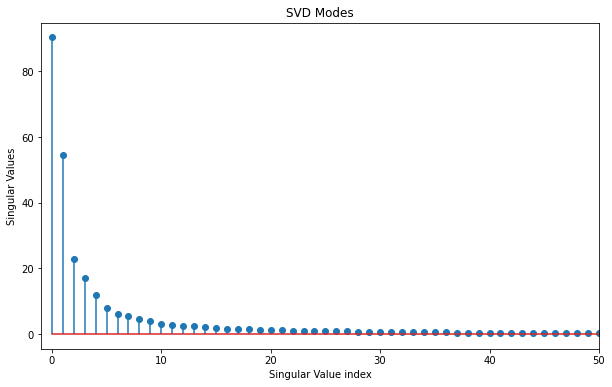

In [202]:
plt.figure(figsize=[10,6])
plt.stem(np.arange(0,s.shape[0],1),s)
plt.xlim(-1,50);
plt.title('SVD Modes'); plt.ylabel('Singular Values')
plt.xlabel('Singular Value index');

leading singular value:

In [203]:
s[0]

90.36480489964875

largest eigenvalue:

In [204]:
w

90.3646008345804

Nearly identical largest singular value and eigenvalue for square correlation matrix of image dataset.

# 2(b)

In [254]:
def randomized_svd(A,p,iterations=3):
    
    '''compute randomized SVD.'''
    
    P = np.random.randn(A.shape[1],p)
    
    # Multiply A by Random matrix P
    Z = A@P
    
    # Power Iterations
    for i in np.arange(0,iterations,1):
        Z = A@(A.T@Z)
        
    # QR Decomp - get orthogonal bases for Z
    Q,R = np.linalg.qr(Z)
    
    # Changes Bases
    Z = Q.T@A

    u,s,v = np.linalg.svd(Z, full_matrices=False)
    # project Q into u
    u = Q@u
    
    return u,s,v

10 randomized vectors in P, then projecting A into P, then recreating SVD with rSVD.

In [206]:
%%timeit
randomized_svd(Acorr, 10)

2.26 ms ± 34 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [207]:
%%timeit
np.linalg.svd(Acorr, 10)

8.16 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [241]:
ru,rs,rv = randomized_svd(Acorr,10,2)

(10, 272)


In [242]:
ru.shape

(272, 10)

In [243]:
rs.shape

(10,)

In [244]:
rv.shape

(10, 272)

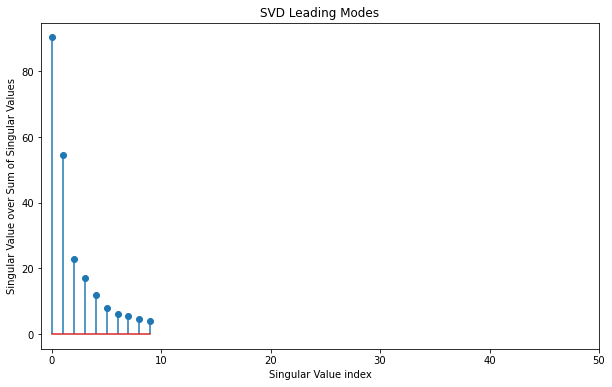

In [245]:
plt.figure(figsize=[10,6])
plt.stem(np.arange(0,rs.shape[0],1),rs)
plt.xlim(-1,50);
plt.title('SVD Leading Modes'); plt.ylabel('Singular Value over Sum of Singular Values')
plt.xlabel('Singular Value index');

# 2(c)

comparing randomized modes to true modes

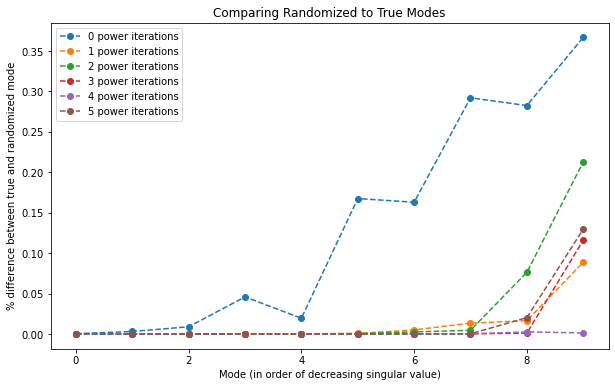

In [274]:
plt.figure(figsize=[10,6])
for i in np.arange(0,6,1):
    ru,rs,rv = randomized_svd(Acorr,10,i)
    plt.plot(np.abs(s[:10]-rs) / s[:10], label=str(i)+' power iterations', ls='--', marker='o')
plt.ylabel('% difference between true and randomized mode'); plt.legend()
plt.xlabel('Mode (in order of decreasing singular value)')
plt.title('Comparing Randomized to True Modes');

With more power iterations (expensive computuationally) accuracy of the rSVD improves. Regardless of power iterations, in this case, the first few modes are very close to the true modes.

In [302]:
Bcorr=Acorr.copy()

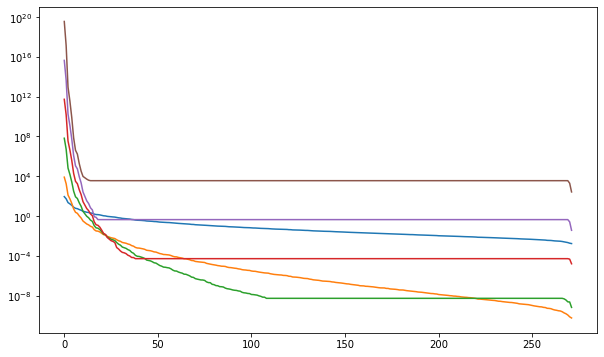

In [310]:
plt.figure(figsize=[10,6])
U,S,V = np.linalg.svd(Acorr,full_matrices=False)
Y=Bcorr
#S=S/S[0]
Bcorr=U@np.diag(S)@V
plt.plot(S)
for q in np.arange(1,6,1):
    Y=Bcorr.T@Y
    Y=Bcorr@Y
    Uq,Sq,VTq = np.linalg.svd(Y, full_matrices=False)
    plt.plot(Sq)
plt.yscale('log')

Singular values of the matrix already decay quite quickly, so I have put it on a log plot above 